In [1]:
import random
import math
import time
import numpy as np
import networkx as nx
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Disjoint Set (Union-Find) data structure
class DisjointSet:
    def __init__(self, size):
        self.parent = [i for i in range(size)]
    
    def find(self, node):
        # function to find
        if self.parent[node] != node:
            self.parent[node] = self.find(self.parent[node])
        return self.parent[node]
    
    def union(self, u, v):
        # Union function
        root_u = self.find(u)
        root_v = self.find(v)
        if root_u != root_v:
            self.parent[root_u] = root_v

In [3]:
# Kruskal's algorithm for Minimum Spanning Tree
def apply_kruskals_algorithm(graph):
    # gather all unique edges and weights
    edges = []  # will append tuple with following format: (i, j, w)
    for i in range(len(graph)):
        for j in range(i + 1, len(graph)):
            if graph[i][j] != 0:
                edges.append((i, j, graph[i][j]))
    
    # sort edges by weight
    edges.sort(key=lambda x: x[2])
    
    num_nodes = len(graph)
    mst = []
    # initializing the disjoint set
    ds = DisjointSet(num_nodes)
    
    for edge in edges:
        u, v, weight = edge
        # checking if this edge in mst does not form a cycle
        if ds.find(u) != ds.find(v):
            mst.append(edge)
            ds.union(u, v)
    
    return mst

In [4]:
def generate_random_graph(n):
    """Function to generate a random graph with 'n' nodes """
    # generate a random graph with n nodes
    # probability an edge gets created bt two nodes
    p = random.uniform(0.5, 1)  
    
    # create a graph
    G = nx.erdos_renyi_graph(n, p)
    nodes = G.number_of_nodes()
    edges = G.number_of_edges()
    
    # array representation of graph
    arr = nx.to_numpy_array(G)
    # assign random weights between 1 to 100 to edges
    weights_generalization = np.random.randint(1, high=100, size=arr.shape, dtype=int)
    arr = np.multiply(arr,weights_generalization)
    
    return arr, nodes, edges

In [5]:
# Test Kruskal's algorithm for different 'n' values
n_values = [10, 100, 1000, 10000]
edge_count=[]
time_taken=[]
for n in n_values:
    graph, nv, ev = generate_random_graph(n)
    edge_count.append(ev)
    
    start_time = time.time()
    mst = apply_kruskals_algorithm(graph)
    end_time = time.time()
    
    execution_time = end_time - start_time
    time_taken.append(execution_time)
    
    print(f"\nnodes = {n}\nedges = {ev}\nExecution time: {execution_time:.6f}\n")
    print("-"*16)
print('nvals: ', n_values)    
print('time_take: ', time_taken)


nodes = 10
edges = 24
Execution time: 0.000104

----------------

nodes = 100
edges = 3453
Execution time: 0.009038

----------------

nodes = 1000
edges = 431931
Execution time: 1.020874

----------------

nodes = 10000
edges = 34887244
Execution time: 95.125358

----------------
nvals:  [10, 100, 1000, 10000]
time_take:  [0.00010418891906738281, 0.009037971496582031, 1.0208740234375, 95.12535810470581]


In [8]:
#Generating the dataframe from Experimental data 
df1 = pd.DataFrame.from_dict({'n_vals': n_values, 'y_val': time_taken, 'm_val': edge_count})
df1 = df1.assign(hue=['experimental']*len(df1))
df1 

,n_vals,y_val,m_val,hue
0,10,0.000104,24,experimental
1,100,0.009038,3453,experimental
2,1000,1.020874,431931,experimental
3,10000,95.125358,34887244,experimental


In [9]:
#Generating the dataframe from theoretical data 
df2=pd.DataFrame.from_dict({'n_vals': n_values, 'm_val': edge_count})
# Calculating time taken theoretically and assigning it to y_val
df2 = df2.assign(y_val=df2.m_val*df2.n_vals.apply(lambda x: math.log(x))) 
df2 = df2.assign(hue=['theoretical']*len(df2))
df2

,n_vals,m_val,y_val,hue
0,10,24,5.526204e+01,theoretical
1,100,3453,1.590165e+04,theoretical
2,1000,431931,2.983674e+06,theoretical
3,10000,34887244,3.213234e+08,theoretical


In [20]:
# Determining the scale factor and applying it to the y_val
dft = df1.merge(df2, on='n_vals', how='left')
scaling_factor = (dft.y_val_y/dft.y_val_x).mean()
df1 = df1.assign(y_val_scaled=df1.y_val*scaling_factor)
df1

,n_vals,y_val,m_val,hue,y_val_scaled
0,10,0.000104,24,experimental,2.237558e+02
1,100,0.009038,3453,experimental,1.940992e+04
2,1000,1.020874,431931,experimental,2.192426e+06
3,10000,95.125358,34887244,experimental,2.042910e+08


In [13]:
# Applying log to the m_val 
df1.m_val.apply(lambda x: math.log(x)).tolist(), 

([3.1780538303479458,
  8.146998697389993,
  12.976021132247073,
  17.36763181892806],)

In [56]:
# Joining the two data frames for both experimental and theoretical values.
df1.join(df2, lsuffix='_Exp', rsuffix='_Theo', how='right')

,n_vals_Exp,y_val_Exp,m_val_Exp,hue_Exp,y_val_scaled,n_vals_Theo,m_val_Theo,y_val_Theo,hue_Theo
0,10,0.000104,24,experimental,2.237558e+02,10,24,5.526204e+01,theoretical
1,100,0.009038,3453,experimental,1.940992e+04,100,3453,1.590165e+04,theoretical
2,1000,1.020874,431931,experimental,2.192426e+06,1000,431931,2.983674e+06,theoretical
3,10000,95.125358,34887244,experimental,2.042910e+08,10000,34887244,3.213234e+08,theoretical


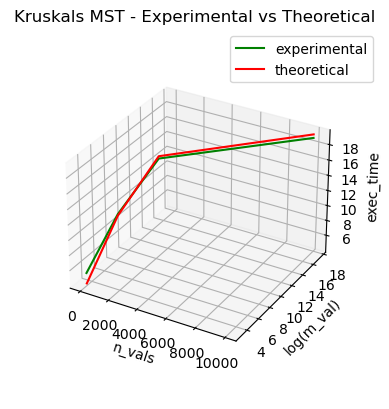

In [63]:
#plotting a 3d graph for m,n,mlogn

ax = plt.axes(projection ='3d')

# plotting experimental
# note: Plotting the logarithmic m_vals and time taken
ax.plot(df1.n_vals.tolist(), 
        df1.m_val.apply(lambda x: math.log(x)).tolist(), 
        df1.y_val_scaled.apply(lambda x: math.log(x)).tolist(), 
        'green', label = "experimental")
# plotting theoretical
# note: Plotting the logarithmic m_vals and time taken
ax.plot(df2.n_vals.tolist(),
        df2.m_val.apply(lambda x: math.log(x)).tolist(), 
        df2.y_val.apply(lambda x: math.log(x)).tolist(), 
        'red', label = "theoretical")
ax.set_xlabel('n_vals')
ax.set_ylabel('log(m_val)')
ax.set_zlabel('exec_time')
ax.set_title('Kruskals MST - Experimental vs Theoretical')
ax.set_box_aspect(aspect=None, zoom=0.8)
plt.legend()
plt.show()